In [1]:
import pandas
import matplotlib.pyplot as plt
import numpy as np
from IPython import get_ipython
import math


get_ipython().run_line_magic('matplotlib', 'inline')

In [2]:
path = "/home/miguel/catkin_ws/src/simulation_files/saved_files_and_results/test_2/"
file = "amcl_marker"
file_2 = "_num_markers"
file_3 = "_num_particles"
file_4 = "_weight_sensor"
file_5 = "_marker_error"
type_file =".txt"
full_path = str(path + file + type_file)
full_path_2 = str(path + file  + file_2 + type_file)
full_path_3 = str(path + file  + file_3 + type_file)
full_path_4 = str(path + file  + file_4 + type_file)
full_path_5 = str(path + file  + file_5 + type_file)
full_path_5

'/home/miguel/catkin_ws/src/simulation_files/saved_files_and_results/test_2/amcl_marker_marker_error.txt'

In [3]:
data = pandas.read_csv(full_path, skipinitialspace = True)
data.head()

,Time,X position error,Y position error,Position error,YAW error,X deviation,Y deviation,YAW deviation,Mean deviation
0,3.094,0.009664,0.035323,0.036621,0.006770,0.453996,0.391670,0.121933,0.322533
1,4.692,0.038366,0.055213,0.067234,0.053620,0.418825,0.322432,0.088607,0.276621
2,6.090,0.022191,0.077523,0.080637,0.283263,0.411462,0.284124,0.085117,0.260235
3,7.690,0.022847,0.075782,0.079151,0.278187,0.384815,0.244697,0.082108,0.237207
4,9.190,0.020445,0.060855,0.064198,0.376449,0.373232,0.232109,0.082946,0.229429


In [4]:
data_2 = pandas.read_csv(full_path_2, skipinitialspace = True)
data_2.head()

,Time,Num Markers
0,0.165,1
1,0.447,1
2,0.667,1
3,0.912,1
4,1.100,1


In [5]:
data_3 = pandas.read_csv(full_path_3, skipinitialspace = True)
data_3.head()

,Time,Num Particles
0,0.006,1873
1,3.096,1023
2,4.692,522
3,6.090,501
4,7.690,501


In [6]:
data_4 = pandas.read_csv(full_path_4, skipinitialspace = True)
data_4.head()

,Time,Weight Laser,Weight Marker
0,0.000,0,0.000000
1,3.093,0,3.398781
2,4.691,0,4.534930
3,6.090,0,5.239740
4,7.690,0,5.405866


In [7]:
data_5 = pandas.read_csv(full_path_5, skipinitialspace = True)
data_5.head()

,Time,Marker Error
0,3.093,0.370849
1,4.691,0.201155
2,6.090,0.124280
3,7.690,0.112712
4,9.190,0.103339


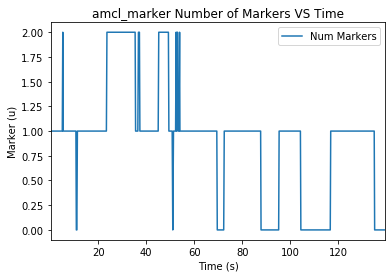

In [8]:
data_2.plot(kind = "line", x = "Time" ,y = {"Num Markers"})
plt.ylabel("Marker (u)")
plt.xlabel("Time (s)")
plt.title(file + " Number of Markers VS Time")
plt.savefig( file + "_num_markers.png")

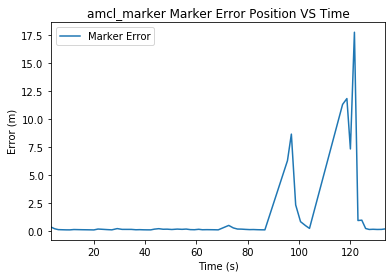

In [9]:
data_5.plot(kind = "line", x = "Time" ,y = {"Marker Error"})
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.title(file + " Marker Error Position VS Time")
plt.savefig( file + "_marker_error_position.png")

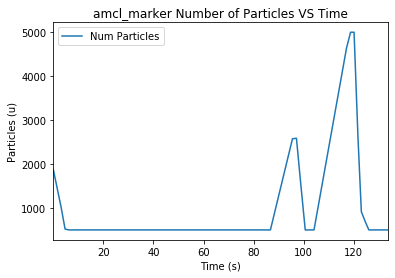

In [10]:
data_3.plot(kind = "line", x = "Time" ,y = {"Num Particles"})
plt.ylabel("Particles (u)")
plt.xlabel("Time (s)")
plt.title(file + " Number of Particles VS Time")
plt.savefig( file + "_num_particles.png")

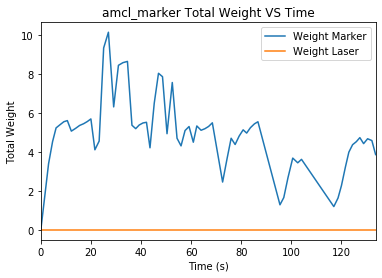

In [11]:
data_4.plot(kind = "line", x = "Time" ,y = {"Weight Laser", "Weight Marker"})
plt.ylabel("Total Weight")
plt.xlabel("Time (s)")
plt.title(file + " Total Weight VS Time")
plt.savefig( file + "_total_weight.png")

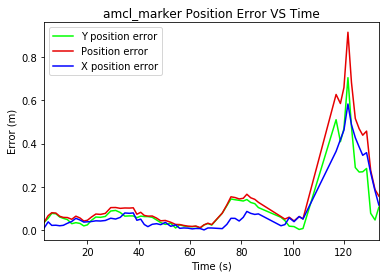

In [12]:
data.plot(kind = "line", x = "Time" ,y = {"X position error", "Y position error", "Position error"}, color = {(0.9,0.0,0.0), (0.0,1.0,0.0), (0.0,0.0,1.0)})
plt.ylabel("Error (m)")
plt.xlabel("Time (s)")
plt.title(file + " Position Error VS Time")
plt.savefig( file + "_position_error.png")

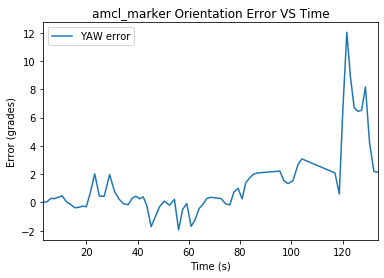

In [13]:
data.plot(kind = "line", x = "Time" ,y = {"YAW error"})
plt.ylabel("Error (grades)")
plt.xlabel("Time (s)")
plt.title(file + " Orientation Error VS Time")
plt.savefig(file + "_orientation_error.png")

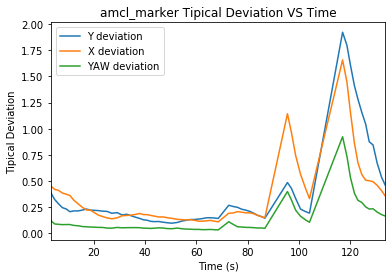

In [14]:
data.plot(kind = "line", x = "Time" ,y = {"X deviation", "Y deviation", "YAW deviation"})
plt.ylabel("Tipical Deviation")
plt.xlabel("Time (s)")
plt.title(file + " Tipical Deviation VS Time")
plt.savefig(file + "_tipical_desviation.png")

In [15]:
mean_x_error = round(data["X position error"].mean(), 3)
mean_y_error = round(data["Y position error"].mean(), 3)
mean_pos_error = round(data["Position error"].mean(), 3)
mean_yaw = round(data["YAW error"].abs().mean(), 3)
mean_x_covariance = round(data["X deviation"].mean(), 3)
mean_y_covariance = round(data["Y deviation"].mean(), 3)
mean_yaw_covariance = round(data["YAW deviation"].mean(), 3)
mean_weight_laser = round(data_4["Weight Laser"].mean(), 3)
mean_weight_marker = round(data_4["Weight Marker"].mean(), 3)
name_file = path + file + "_results.txt"
results = open(name_file, "w")
results.write("Mean laser weight: " + str(mean_weight_laser) + "\n")
results.write("Mean Marker weight: " + str(mean_weight_marker) + "\n")
results.write("Mean X position error: " + str(mean_x_error) + "\n")
results.write("Mean Y position error: " + str(mean_y_error) + "\n")
results.write("Mean Pos position error: " + str(mean_pos_error) + "\n")
results.write("Mean YAW error: " + str(mean_yaw) + "\n")
results.write("Mean X deviation: " + str(mean_x_covariance) + "\n")
results.write("Mean Y deviation: " + str(mean_y_covariance) + "\n")
results.write("Mean YAW deviation: " + str(mean_yaw_covariance) + "\n")
results.close()
name_file = path + file + "_results_comparative.txt"
comparative = open(name_file, "w")
comparative.write("Laser weight,Marker weight,X position error,Y position error,Pos position error,YAW error,X deviation,Y deviation,YAW deviation\n")
comparative.write(str(mean_weight_laser) + ",")
comparative.write(str(mean_weight_marker) + ",")
comparative.write(str(mean_x_error) + ",")
comparative.write(str(mean_y_error) + ",")
comparative.write(str(mean_pos_error) + ",")
comparative.write(str(mean_yaw) + ",")
comparative.write(str(mean_x_covariance) + ",")
comparative.write(str(mean_y_covariance) + ",")
comparative.write(str(mean_yaw_covariance))
comparative.close()